# Preconditioned Model Building (PMB)

PMB is a method for solving differentiable unconstrained optimization problems. The method requires two arguments: a handle to the objective function, $f:\mathbb{R}^n \mapsto \mathbb{R}$ and an initial starting solution, $x_0 \in \mathbb{R}^n$. The function handle should return the function value as well as the gradient vector. There is also an optional third argument ```pars```, which is used to specify different parameters (more on this later). 

Here are six functions that we shall use for demonstrating PMB.

In [1]:
include("testfunctions.jl")
funcs = [rosenbrock, fletchcr, eg2, liarwhd, edensch, nonscomp];

Let's start with the well-known ```rosenbrock```. The optimal objective function value for this function is 0.0. First we need to include the PMB solver called ```pmbsolve```.

In [2]:
include("pmbsolve.jl")

pmbsolve (generic function with 2 methods)

We then create a handle to the function and an initial starting solution.

In [3]:
fun = funcs[1] # handle to the function
n = 10 # dimension of the problem
# initial starting solution
x0 = 5.0 + rand(n)*10.0;

In [4]:
pmbout = pmbsolve(fun, x0);

Function value decreases less than ftol


Here is the output structure.

In [5]:
fieldnames(pmbout)

10-element Array{Symbol,1}:
 :x     
 :fval  
 :g     
 :fhist 
 :nghist
 :fcalls
 :niter 
 :nmbs  
 :exit  
 :time  

The description of each field is given below:
* ```fcalls```: Total number of function calls to solve the problem
* ```nmbs```: Total number of times a model is built during the inner iterations
* ```exit```: Exit status (the associated parameters with each status is given in parantheses)
    * 1: First order condition is met (```pars.gtol```)
    * 0: Maximum number of inner iterations is reached (```pars.maxiniter```)
    * -1: Maximum number of iterations is reached (```pars.maxiter```)
    * -2: Maximum number of function calls is reached (```pars.maxfcalls```)
    * -3: Time limit is reached (```pars.maxtime```)
    * -4: Change in function value between two consecutive iterations is below tolerance (```pars.ftol```)
* ```time```: Time to solve the problem in seconds
* ```x```: Final solution
* ```g```: Final gradient at $x$
* ```niter```: Number of iterations

In [6]:
println("Objective function value: ", pmbout.fval)
println("Norm of the gradient: ", norm(pmbout.g, Inf))
println("Number of function calls: ", pmbout.fcalls)
println("Number of iterations: ", pmbout.niter)
println("Number of model building steps: ", pmbout.nmbs)
println("Time in seconds: ", pmbout.time)

Objective function value: 4.3512938330974133e-10
Norm of the gradient: 0.0008231214989091986
Number of function calls: 208
Number of iterations: 99
Number of model building steps: 108
Time in seconds: 0.4311511516571045


How about a large-scale version of the same problem?

In [8]:
n = 10000
x0 = 5.0 + rand(n)*10.0
pmbout = pmbsolve(fun, x0)
println("Objective function value: ", pmbout.fval)
println("Norm of the gradient: ", norm(pmbout.g, Inf))
println("Number of function calls: ", pmbout.fcalls)
println("Number of iterations: ", pmbout.niter)
println("Number of model building steps: ", pmbout.nmbs)
println("Time in seconds: ", pmbout.time)

Function value decreases less than ftol
Objective function value: 3.036399732309477e-8
Norm of the gradient: 0.0013528236199341198
Number of function calls: 538
Number of iterations: 122
Number of model building steps: 290
Time in seconds: 0.3735830783843994


We can also try other functions with even larger dimensions. For instance a 100K-dimensional ```nonscomp```, whose optimal objective function value is again 0.0.

In [9]:
fun = funcs[6]
n = 100000
x0 = 5.0 + rand(n)*10.0
pmbout = pmbsolve(fun, x0)
println("Objective function value: ", pmbout.fval)
println("Norm of the gradient: ", norm(pmbout.g, Inf))
println("Number of function calls: ", pmbout.fcalls)
println("Number of iterations: ", pmbout.niter)
println("Number of model building steps: ", pmbout.nmbs)
println("Time in seconds: ", pmbout.time)

Function value decreases less than ftol
Objective function value: 1.4852851712215866e-8
Norm of the gradient: 0.0001796682873669323
Number of function calls: 589
Number of iterations: 44
Number of model building steps: 296
Time in seconds: 1.462162971496582


## Options

The solver also takes an optional argument ```pars```. This parameter has the following fields. Note that the default values of the parameters are given in parantheses:

* ```M```: The memory size for the preconditioner (```5```)
* ```gtol```: The tolerance for the first-order optimality (```1.0e-5```)
* ```ftol```: The normalized difference between two consecutive function values (```1.0e-8```)
* ```display```: To display information about the progress in every iteration (```false```)
* ```message```: Shows a message about the exit condition or errors (```true```)
* ```history```: Stores the function values and the first-order errors throughout the iterations (```false```) 
* ```maxiter```: Maximum number of iterations (```1000```)
* ```maxiniter```: Maximum number of inner iterations for model building (```100```)
* ```maxfcalls```: Maximum number of function calls (```1000```)
* ```maxtime```: Maximum computation time in seconds (```3600```)

To change one of these parameters, we need to specify the value by using ```pars``` keyword defined within ```pmbsolve```. Suppose that we want to plot the progress of the objective function values when ```pmbsolve``` is called for 100-dimensional ```fletchcr``` (optimal objective function value is 0.0).

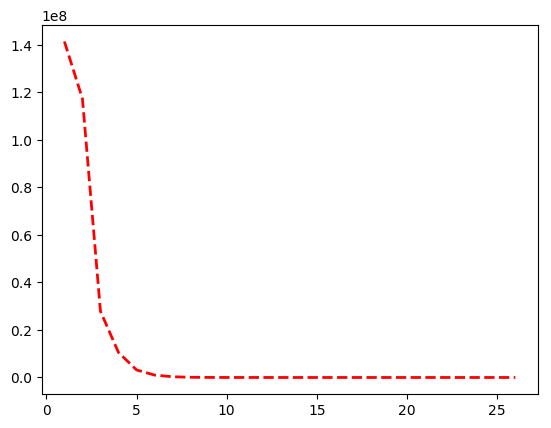

Iter: 0 ===> 	 f = 141336396.687561 	 norm(g) = 13968.937405
Iter: 1 ===> 	 f = 117266163.503069 	 norm(g) = 11345.048044
Iter: 2 ===> 	 f = 27840664.357505 	 norm(g) = 3740.726424
Iter: 3 ===> 	 f = 10510192.644538 	 norm(g) = 1635.287848
Iter: 4 ===> 	 f = 3182844.093602 	 norm(g) = 722.028986
Iter: 5 ===> 	 f = 1012924.542429 	 norm(g) = 275.988175
Iter: 6 ===> 	 f = 303333.065849 	 norm(g) = 138.997521
Iter: 7 ===> 	 f = 86881.105829 	 norm(g) = 47.043249
Iter: 8 ===> 	 f = 22412.631549 	 norm(g) = 31.180470
Iter: 9 ===> 	 f = 5203.327602 	 norm(g) = 33.670195
Iter: 10 ===> 	 f = 1536.105969 	 norm(g) = 33.572104
Iter: 11 ===> 	 f = 189.424288 	 norm(g) = 11.428034
Iter: 12 ===> 	 f = 33.928834 	 norm(g) = 5.693095
Iter: 13 ===> 	 f = 6.573802 	 norm(g) = 0.761157
Iter: 14 ===> 	 f = 2.719851 	 norm(g) = 0.465036
Iter: 15 ===> 	 f = 0.454353 	 norm(g) = 0.098977
Iter: 16 ===> 	 f = 0.033668 	 norm(g) = 0.035041
Iter: 17 ===> 	 f = 0.010980 	 norm(g) = 0.043873
Iter: 18 ===> 	 f = 0

In [11]:
fun = funcs[2]
n = 100
x0 = 5.0 + rand(n)*10.0
pars.history = true
pars.display = true
pmbout = pmbsolve(fun, x0, pars) # NOTE the third optional argument

using PyPlot
x = 1:length(pmbout.fhist)
plot(x, pmbout.fhist, color="red", linewidth=2.0, linestyle="--");